In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/quandang/vietnamese-foods",force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heydan98
Your Kaggle Key: ··········


100%|██████████| 4.17G/4.17G [02:19<00:00, 32.0MB/s]


In [ ]:
cd /content/vietnamese-foods/Images/Train

/content/vietnamese-foods/Images/Train


In [ ]:
ls

'Banh beo'/      'Banh khot'/         'Bun mam'/         'Goi cuon'/
'Banh bot loc'/  'Banh mi'/           'Bun rieu'/        'Hu tieu'/
'Banh can'/      'Banh pia'/          'Bun thit nuong'/  'Mi quang'/
'Banh canh'/     'Banh tet'/          'Ca kho to'/       'Nem chua'/
'Banh chung'/    'Banh trang nuong'/  'Canh chua'/        Pho/
'Banh cuon'/     'Banh xeo'/          'Cao lau'/         'Xoi xeo'/
'Banh duc'/      'Bun bo Hue'/        'Chao long'/
'Banh gio'/      'Bun dau mam tom'/   'Com tam'/


In [ ]:
import shutil
shutil.rmtree('Banh beo')
shutil.rmtree('Banh bot loc')
shutil.rmtree('Banh can')     
shutil.rmtree('Banh khot')
shutil.rmtree('Bun mam')         
shutil.rmtree('Goi cuon')  
shutil.rmtree('Banh mi') 
shutil.rmtree('Bun rieu')        
shutil.rmtree('Hu tieu')
shutil.rmtree('Banh pia')
shutil.rmtree('Bun thit nuong')
shutil.rmtree('Mi quang')
shutil.rmtree('Banh canh')    
shutil.rmtree('Banh tet')          
shutil.rmtree('Ca kho to')
shutil.rmtree('Nem chua')
shutil.rmtree('Banh chung')    
shutil.rmtree('Banh trang nuong')
shutil.rmtree('Canh chua')
shutil.rmtree("Pho")
shutil.rmtree('Banh cuon')
shutil.rmtree('Cao lau')        


In [ ]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=10,  
                             zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1),
                             rescale=1/255.0)

valid_datagen = ImageDataGenerator(rescale=1/255.0)

test_datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [ ]:
im_size = 224
batch_size = 64

train_generator = train_datagen.flow_from_directory(
    directory=r"./",
    target_size=(im_size, im_size),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 5219 images belonging to 8 classes.


In [ ]:
for image in train_generator:
  print(type(image))
  print(type(image[0]))
  print(image[0].shape)
  break

<class 'tuple'>
<class 'numpy.ndarray'>
(64, 224, 224, 3)


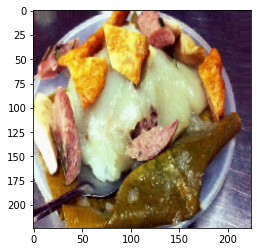

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(image[0][9])

In [ ]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"./",
    target_size=(im_size, im_size),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 5219 images belonging to 8 classes.


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [ ]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [ ]:
from pathlib import Path
path = Path('/content/vietnamese-foods/Images/Train')
class_names = list(path.glob('*'))
for class_name in class_names:
  print(class_name)

/content/vietnamese-foods/Images/Train/Bun bo Hue
/content/vietnamese-foods/Images/Train/Bun dau mam tom
/content/vietnamese-foods/Images/Train/Chao long
/content/vietnamese-foods/Images/Train/Banh xeo
/content/vietnamese-foods/Images/Train/Xoi xeo
/content/vietnamese-foods/Images/Train/Banh duc
/content/vietnamese-foods/Images/Train/Banh gio
/content/vietnamese-foods/Images/Train/Com tam


In [ ]:
cd /content/vietnamese-foods/Images/Train

/content/vietnamese-foods/Images/Train


In [ ]:
ls

'Banh duc'/  'Banh xeo'/    'Bun dau mam tom'/  'Com tam'/
'Banh gio'/  'Bun bo Hue'/  'Chao long'/        'Xoi xeo'/


In [ ]:
import cv2
X = []
y = []
food = ['Banh gio', 'Bun dau mam tom', 'Banh xeo',   'Bun bo Hue',  'Com tam','Chao long',  'Banh duc',   'Xoi xeo']
# food.index('dandelion')
for class_name in class_names:
  print(class_name)
  images_path = list(class_name.glob('*'))
  for im_path in images_path:
    img = cv2.imread(str(im_path))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64))
    label = food.index(str(class_name).split('/')[-1])
    X.append(img)
    y.append(label)

/content/vietnamese-foods/Images/Train/Bun bo Hue
/content/vietnamese-foods/Images/Train/Bun dau mam tom
/content/vietnamese-foods/Images/Train/Chao long
/content/vietnamese-foods/Images/Train/Banh xeo
/content/vietnamese-foods/Images/Train/Xoi xeo
/content/vietnamese-foods/Images/Train/Banh duc
/content/vietnamese-foods/Images/Train/Banh gio
/content/vietnamese-foods/Images/Train/Com tam


In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(5219, 8)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [ ]:
# X_train = X_train.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255
# X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

[0. 0. 1. 0. 0. 0. 0. 0.]
(4175, 64, 64, 3)
(1044, 64, 64, 3)
(4175, 8)
(1044, 8)


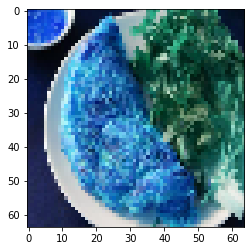

In [ ]:
plt.imshow(X_train[5])
print(y_train[5])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical
import cv2
import numpy as np
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
model.fit(X_train,y_train,epochs=200,batch_size=128)

Epoch 1/200
33/33 [==============================] - 9s 27ms/step - loss: 2.0717 - accuracy: 0.1895
Epoch 2/200
33/33 [==============================] - 1s 20ms/step - loss: 1.9263 - accuracy: 0.2822
Epoch 3/200
33/33 [==============================] - 1s 20ms/step - loss: 1.7968 - accuracy: 0.3497
Epoch 4/200
33/33 [==============================] - 1s 20ms/step - loss: 1.6343 - accuracy: 0.4311
Epoch 5/200
33/33 [==============================] - 1s 20ms/step - loss: 1.4622 - accuracy: 0.4925
Epoch 6/200
33/33 [==============================] - 1s 20ms/step - loss: 1.3427 - accuracy: 0.5243
Epoch 7/200
33/33 [==============================] - 1s 20ms/step - loss: 1.2515 - accuracy: 0.5650
Epoch 8/200
33/33 [==============================] - 1s 20ms/step - loss: 1.1566 - accuracy: 0.6062
Epoch 9/200
33/33 [==============================] - 1s 20ms/step - loss: 1.0115 - accuracy: 0.6522
Epoch 10/200
33/33 [==============================] - 1s 20ms/step - loss: 0.9465 - accuracy: 0.6836

In [ ]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 6ms/step - loss: 5.3366 - accuracy: 0.5498


[5.336631774902344, 0.5498084425926208]

(64, 64, 3)
1/1 [==============================] - 0s 131ms/step
Banh gio


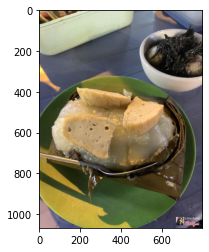

In [ ]:
import cv2
# url = 'download (5).jpeg'
# n=2
n = 3
images_test = list(Path('/content/vietnamese-foods/Images/Train/Banh gio/').glob('*g'))
# print(images_test)
url = images_test[n]
image = cv2.imread(str(url))
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img, (64,64))
img = img.astype('float32')/255
print(img.shape)
pred = model.predict(img.reshape((1, 64, 64, 3)))
print(food[pred.argmax()])